Derek Yadgaroff

Assignment 3, Exercise 1

21VT-2DV516

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
# Load Data
data = np.loadtxt('./data/mnistsub.csv',delimiter=',')
X = data[:, 0:-1]
y = data[:, -1]

# Normalize Data
max_val = np.amax(X)
min_val = np.amin(X)
range_val = max_val - min_val
X_normalized = np.divide(X,range_val)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size = .7, shuffle=True, random_state = 3)

### Recall...

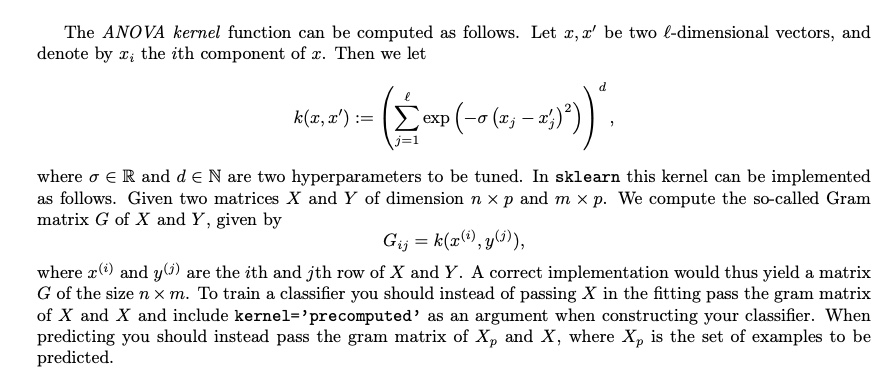

#### Create custom Anova Kernel

In [5]:
def compute_gram_X_Y(X, Y, sigma = .01, degree = 2):
    n = len(X)
    m = len(Y)

    # Initialize 'empty' matrix, Where X.shape = (n,p), and Y.shape = (m,p), create an (n,m) matrix G
    G = np.zeros((n,m))

    
    for i in range(n):
        for j in range(m):
            xrow = X[i,:]
            yrow = Y[j,:]
            # Compute the x,y index of G using the formula
            G[i,j]= np.sum( np.exp( -sigma * (xrow-yrow) **2 )) ** degree

    return G

#### Perform Custom Gridsearch

In [10]:
# store best values
best_sig = None
best_deg = None
best_c = None
best_accuracy = None

for deg in [1, 2]:
    for c in [10, 100]:
        for sig in [.01, .1]:

            # Compute gram X_train and X_train
            G_train = compute_gram_X_Y(X_train,X_train,sig,deg)

            # Create SVC instance and fit using precomputed gram matrix
            clf = SVC(kernel="precomputed",C=c)
            clf.fit(G_train,y_train)

            # Predict using gram of X_test and X_train
            G_test = compute_gram_X_Y(X_test,X_train)
            y_pred = clf.predict(G_test)

            # Get accuracy to find best hyperparameters
            accuracy = np.sum(y_pred == y_test)/len(y_test)
            print("C:",c,"Sig:",sig,"Deg:",deg)
            print("Acc:", accuracy)

            # store best hyperparameters
            try:
                if accuracy > best_accuracy:
                    best_sig = sig
                    best_deg = deg
                    best_c = c
                    best_accuracy = accuracy
            except:
                best_sig = sig
                best_deg = deg
                best_c = c
                best_accuracy = accuracy

# print best hyperparameters
print ("\nBest Params\ntest accuracy:",best_accuracy, "\nsig:",best_sig, "\ndeg:", best_deg, "\nc:",best_c)

C: 10 Sig: 0.01 Deg: 1
Acc: 0.7405857740585774
C: 10 Sig: 0.1 Deg: 1
Acc: 0.6443514644351465
C: 100 Sig: 0.01 Deg: 1
Acc: 0.7364016736401674
C: 100 Sig: 0.1 Deg: 1
Acc: 0.32217573221757323
C: 10 Sig: 0.01 Deg: 2
Acc: 0.7866108786610879
C: 10 Sig: 0.1 Deg: 2
Acc: 0.25523012552301255
C: 100 Sig: 0.01 Deg: 2
Acc: 0.7698744769874477
C: 100 Sig: 0.1 Deg: 2
Acc: 0.25523012552301255

Best Params
test accuracy: 0.7866108786610879 
sig: 0.01 
deg: 2 
c: 10
